In [1]:
import pandas as pd
import numpy as np
#visulization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
# data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# handling class imbalance
from imblearn.over_sampling import SMOTE
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# evalution
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [4]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [5]:
df.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10
135037,1FADP5CU4E,Kitsap,Port Orchard,WA,98366.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,26.0,171102032,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,5.303509e+10


In [6]:
df.shape

(135038, 17)

In [7]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [10]:
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,135038,135030,135030,135038,135030.000000,135038.000000,135038,134789,135038,135038,135037.000000,135037.000000,134726.000000,1.350380e+05,135028,135030,1.350300e+05
unique,9059,169,651,46,NaN,NaN,36,125,2,3,NaN,NaN,NaN,NaN,785,76,NaN
top,5YJYGDEE9M,King,Seattle,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.12301999999994 47.67668000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,473,70842,23489,134726,NaN,NaN,61808,25837,103882,61221,NaN,NaN,NaN,NaN,3482,49369,NaN
mean,NaN,NaN,NaN,NaN,98171.001577,2019.662880,NaN,NaN,NaN,NaN,74.591964,1448.407325,29.504379,2.063432e+08,NaN,NaN,5.297233e+10
std,NaN,NaN,NaN,NaN,2450.367211,3.001676,NaN,NaN,NaN,NaN,98.744120,9683.658138,14.783780,8.582417e+07,NaN,NaN,1.635783e+09
min,NaN,NaN,NaN,NaN,1730.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.081042e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2018.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.606305e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98121.000000,2021.000000,NaN,NaN,NaN,NaN,21.000000,0.000000,34.000000,2.059563e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98370.000000,2022.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,43.000000,2.308888e+08,NaN,NaN,5.305307e+10


In [11]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [12]:
df.nunique()

VIN (1-10)                                             9059
County                                                  169
City                                                    651
State                                                    46
Postal Code                                             786
Model Year                                               22
Make                                                     36
Model                                                   125
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       135038
Vehicle Location                                        785
Electric Utility                                         76
2020 Census Tract                       

In [13]:
print(df['Model'].value_counts())


MODEL 3        25837
MODEL Y        23577
LEAF           13020
MODEL S         7473
BOLT EV         5419
               ...  
GV70               2
FLYING SPUR        1
918                1
Q8                 1
S-10 PICKUP        1
Name: Model, Length: 125, dtype: int64


In [14]:
print(df['Make'].value_counts())

TESLA                   61808
NISSAN                  13150
CHEVROLET               11437
FORD                     6897
BMW                      5895
KIA                      5491
TOYOTA                   4883
VOLKSWAGEN               3526
VOLVO                    3221
AUDI                     2727
JEEP                     2615
HYUNDAI                  2395
CHRYSLER                 2237
RIVIAN                   1806
PORSCHE                   952
FIAT                      807
HONDA                     787
MERCEDES-BENZ             777
MITSUBISHI                748
MINI                      742
POLESTAR                  658
SMART                     277
SUBARU                    272
JAGUAR                    222
LINCOLN                   212
LUCID                     141
CADILLAC                  120
LEXUS                      80
GENESIS                    67
LAND ROVER                 43
FISKER                     15
MAZDA                      12
AZURE DYNAMICS              8
TH!NK     

In [15]:
print(df['City'].value_counts())

Seattle          23489
Bellevue          6960
Redmond           4965
Vancouver         4819
Kirkland          4201
                 ...  
Frederick            1
South Prairie        1
Decatur              1
Goldsboro            1
Gardena              1
Name: City, Length: 651, dtype: int64


In [16]:
df['City'].unique()

array(['Tumwater', 'Clinton', 'Snohomish', 'Seattle', 'Edmonds', 'Manson',
       'Marysville', 'Olympia', 'Lacey', 'Bothell', 'Hansville',
       'Woodway', 'Naches', 'Cashmere', 'Lake Stevens', 'Port Orchard',
       'Monroe', 'Bremerton', 'Poulsbo', 'Kingston', 'Lynnwood',
       'San Rafael', 'Pullman', 'Greenbank', 'Coupeville', 'Yakima',
       'Renton', 'Rochester', 'Anacortes', 'Bainbridge Island', 'Redmond',
       'Elk', 'Everett', 'Dupont', 'Seatac', 'Vashon', 'Leavenworth',
       'Yelm', 'Selah', 'Tempe', 'East Wenatchee', 'Kirkland',
       'Mount Vernon', 'Moses Lake', 'Kent', 'Langley', 'Dayton',
       'Cowiche', nan, 'Brier', 'Arlington', 'Spokane', 'Shoreline',
       'Bellevue', 'Brush Prairie', 'Issaquah', 'Mukilteo', 'Washougal',
       'Friday Harbor', 'Bellingham', 'Seabeck', 'Federal Way',
       'Sammamish', 'Vancouver', 'Mercer Island', 'Lake Forest Park',
       'Tacoma', 'Edgewood', 'Duvall', 'Oak Harbor', 'Sequim', 'Camas',
       'Kelso', 'Tukwila', 'Cama

In [17]:
df['State'].unique()

array(['WA', 'CA', 'AZ', 'AP', 'IL', 'KS', 'VA', 'NE', 'DC', 'MD', 'TX',
       'NV', 'UT', 'GA', 'NC', 'SC', 'MO', 'CO', 'AR', 'FL', 'NJ', 'ID',
       'HI', 'MI', 'DE', 'OR', 'LA', 'OH', 'NM', 'WY', 'TN', 'OK', 'KY',
       'AL', 'MS', 'PA', 'CT', 'IN', 'NY', 'AK', 'MA', 'MT', 'NH', 'BC',
       'RI', 'MN'], dtype=object)

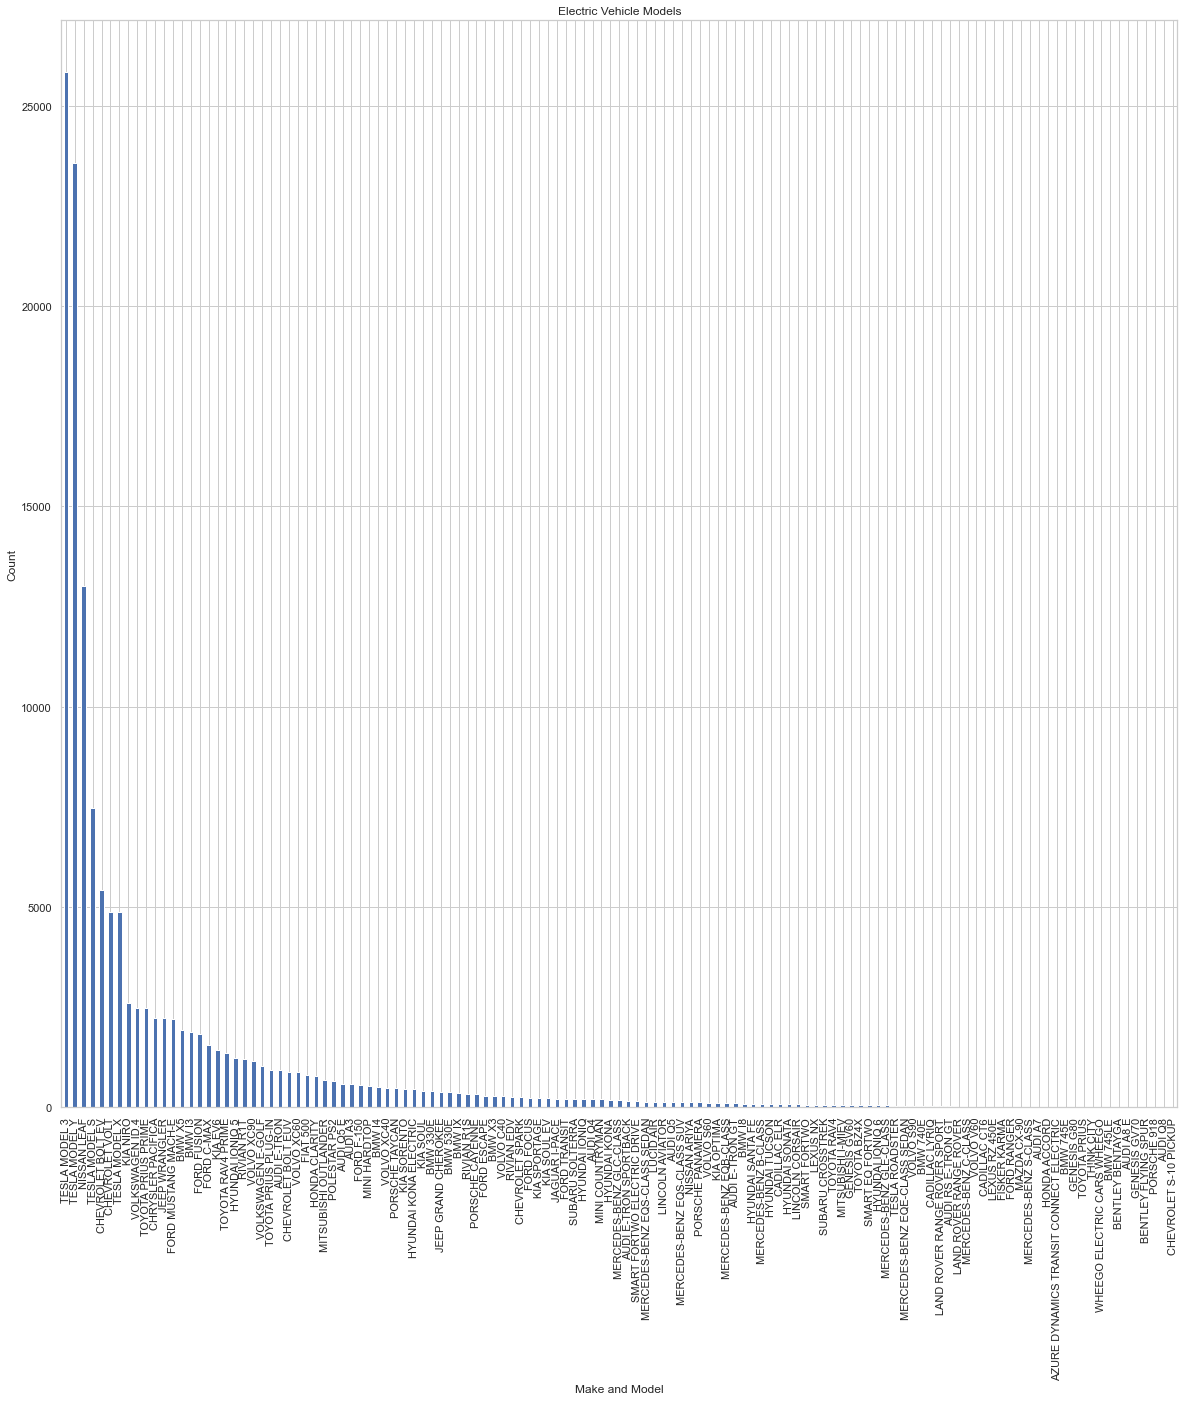

In [18]:
model_counts = df['Make'] + ' ' + df['Model']
model_counts = model_counts.value_counts()
plt.figure(figsize=(20, 20))
model_counts.plot(kind='bar')
plt.title('Electric Vehicle Models')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.show()

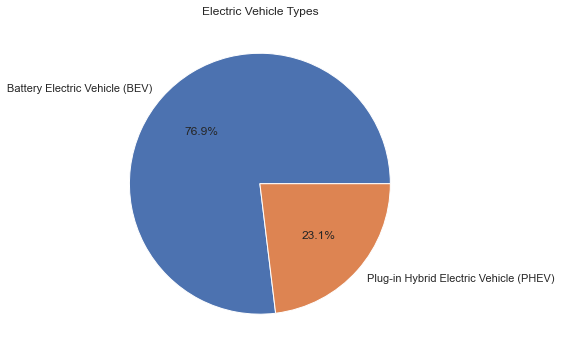

In [19]:
type_counts = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Electric Vehicle Types')
plt.ylabel('')
plt.show()

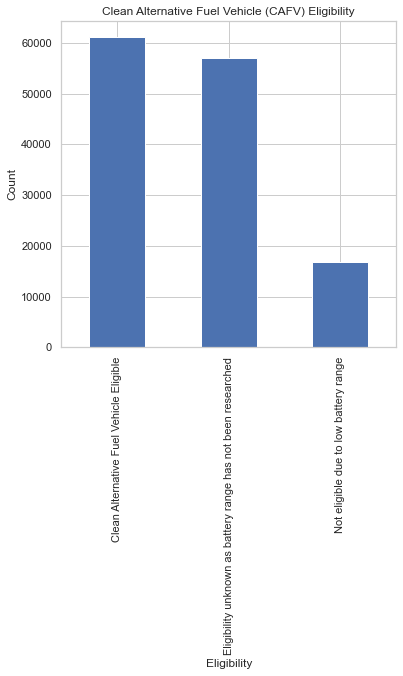

In [20]:
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(6, 6))
cafv_counts.plot(kind='bar')
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xlabel('Eligibility')
plt.ylabel('Count')
plt.show()

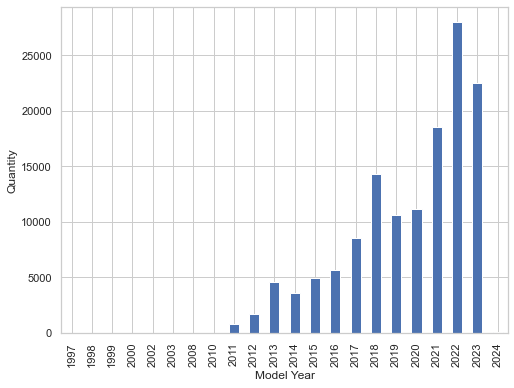

In [21]:
plt.figure(figsize=(8, 6))
df.groupby("Model Year").size().plot(kind="bar")
plt.ylabel("Quantity");

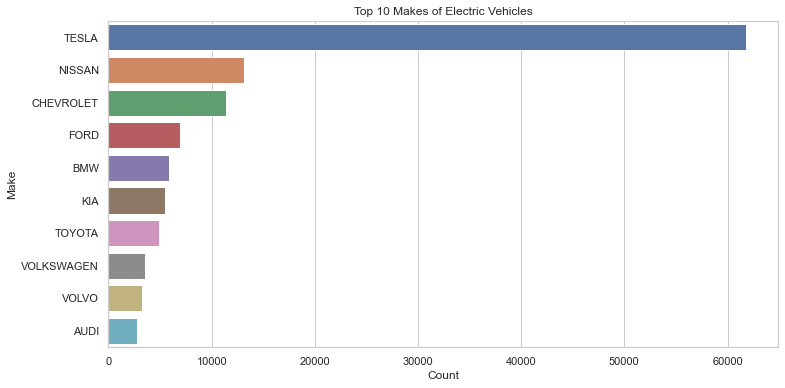

In [22]:
make_counts = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=make_counts.values, y=make_counts.index)
plt.title('Top 10 Makes of Electric Vehicles')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

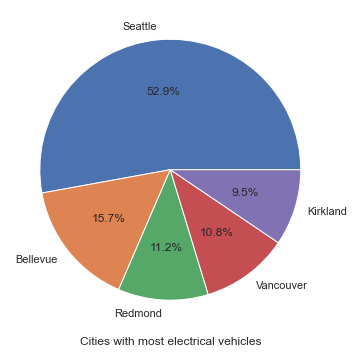

In [23]:
plt.figure(figsize=(8, 6))
df.City.value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel("Cities with most electrical vehicles");

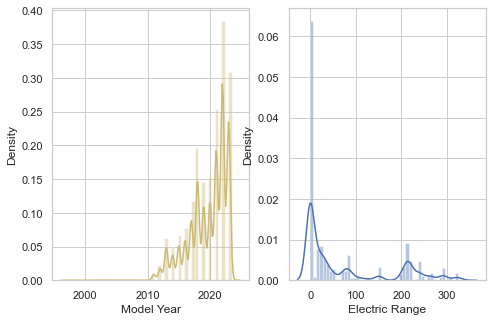

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(df["Model Year"],color="y")
plt.subplot(132)
sns.distplot(df["Electric Range"])
plt.show()

In [25]:
df.nunique()

VIN (1-10)                                             9059
County                                                  169
City                                                    651
State                                                    46
Postal Code                                             786
Model Year                                               22
Make                                                     36
Model                                                   125
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       135038
Vehicle Location                                        785
Electric Utility                                         76
2020 Census Tract                       

In [26]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         61221
Eligibility unknown as battery range has not been researched    56983
Not eligible due to low battery range                           16834
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [27]:
df.drop(['VIN (1-10)','County','City','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Vehicle Location','2020 Census Tract','Electric Utility'],axis=1,inplace=True)

In [28]:
df.columns

Index(['State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range'],
      dtype='object')

In [29]:
df.isna().sum()

State                                                  0
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
dtype: int64

In [30]:
df.dtypes

State                                                 object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
dtype: object

In [31]:
imputer = SimpleImputer(strategy='median') 
df['Electric Range'] = imputer.fit_transform(df[['Electric Range']])

In [32]:
imputer = SimpleImputer(strategy='most_frequent') 
df['Model'] = imputer.fit_transform(df[['Model']])

In [33]:
df.isnull().sum()

State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder_state = LabelEncoder()
df['State'] = label_encoder_state.fit_transform(df['State'])
# Store the mapping in a dictionary
label_mapping_state = dict(zip(label_encoder_state.classes_, label_encoder_state.transform(label_encoder_state.classes_)))
# Display the DataFrame with label-encoded values for the 'State' column
print(df)
# Display the mapping for the 'State' column
print(f"\nMapping for State:\n{label_mapping_state}")


        State  Model Year     Make    Model  \
0          44        2019    TESLA  MODEL 3   
1          44        2022   NISSAN     LEAF   
2          44        2020    TESLA  MODEL 3   
3          44        2020    TESLA  MODEL 3   
4          44        2013    TESLA  MODEL S   
...       ...         ...      ...      ...   
135033     44        2020    TESLA  MODEL S   
135034     44        2021    TESLA  MODEL Y   
135035     44        2022    TESLA  MODEL S   
135036     44        2023  HYUNDAI  IONIQ 5   
135037     44        2014     FORD    C-MAX   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
135033          Battery Electric Vehicle (BEV)   
135034          Battery Electric Ve

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Make = LabelEncoder()
df['Make'] = label_encoder_Make.fit_transform(df['Make'])
# Store the mapping in a dictionary
label_mapping_Make = dict(zip(label_encoder_Make.classes_, label_encoder_Make.transform(label_encoder_Make.classes_)))
# Display the DataFrame with label-encoded values for the 'Make' column
print(df)
# Display the mapping for the 'Make' column
print(f"\nMapping for Make:\n{label_mapping_Make}")

        State  Model Year  Make    Model  \
0          44        2019    30  MODEL 3   
1          44        2022    24     LEAF   
2          44        2020    30  MODEL 3   
3          44        2020    30  MODEL 3   
4          44        2013    30  MODEL S   
...       ...         ...   ...      ...   
135033     44        2020    30  MODEL S   
135034     44        2021    30  MODEL Y   
135035     44        2022    30  MODEL S   
135036     44        2023    12  IONIQ 5   
135037     44        2014     9    C-MAX   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
135033          Battery Electric Vehicle (BEV)   
135034          Battery Electric Vehicle (BEV)   
135035          Batte

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Model = LabelEncoder()
# Fit and transform the 'Model' column with label encoding
df['Model'] = label_encoder_Model.fit_transform(df['Model'])
# Store the mapping in a dictionary
label_mapping_Model = dict(zip(label_encoder_Model.classes_, label_encoder_Model.transform(label_encoder_Model.classes_)))
# Display the DataFrame with label-encoded values for the 'Model' column
print(df)
# Display the mapping for the 'Model' column
print(f"\nMapping for Model:\n{label_mapping_Model}")

        State  Model Year  Make  Model  \
0          44        2019    30     71   
1          44        2022    24     69   
2          44        2020    30     71   
3          44        2020    30     71   
4          44        2013    30     72   
...       ...         ...   ...    ...   
135033     44        2020    30     72   
135034     44        2021    30     74   
135035     44        2022    30     72   
135036     44        2023    12     63   
135037     44        2014     9     20   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
135033          Battery Electric Vehicle (BEV)   
135034          Battery Electric Vehicle (BEV)   
135035          Battery Electric Vehicle (BEV

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder_EV_Type = LabelEncoder()
df['Electric Vehicle Type'] = label_encoder_EV_Type.fit_transform(df['Electric Vehicle Type'])
# Store the mapping in a dictionary
label_mapping_EV_Type = dict(zip(label_encoder_EV_Type.classes_, label_encoder_EV_Type.transform(label_encoder_EV_Type.classes_)))
# Display the DataFrame with label-encoded values for the 'Electric Vehicle Type' column
print(df)
# Display the mapping for the 'Electric Vehicle Type' column
print(f"\nMapping for Electric Vehicle Type:\n{label_mapping_EV_Type}")

        State  Model Year  Make  Model  Electric Vehicle Type  \
0          44        2019    30     71                      0   
1          44        2022    24     69                      0   
2          44        2020    30     71                      0   
3          44        2020    30     71                      0   
4          44        2013    30     72                      0   
...       ...         ...   ...    ...                    ...   
135033     44        2020    30     72                      0   
135034     44        2021    30     74                      0   
135035     44        2022    30     72                      0   
135036     44        2023    12     63                      0   
135037     44        2014     9     20                      1   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  
0                 Clean Alternative Fuel Vehicle Eligible           220.0  
1       Eligibility unknown as battery range has not b...          

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder_CAFV = LabelEncoder()
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder_CAFV.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
# Store the mapping in a dictionary
label_mapping_CAFV = dict(zip(label_encoder_CAFV.classes_, label_encoder_CAFV.transform(label_encoder_CAFV.classes_)))
# Display the DataFrame with label-encoded values for the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column
print(df)
# Display the mapping for the 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column
print(f"\nMapping for Clean Alternative Fuel Vehicle (CAFV) Eligibility:\n{label_mapping_CAFV}")

        State  Model Year  Make  Model  Electric Vehicle Type  \
0          44        2019    30     71                      0   
1          44        2022    24     69                      0   
2          44        2020    30     71                      0   
3          44        2020    30     71                      0   
4          44        2013    30     72                      0   
...       ...         ...   ...    ...                    ...   
135033     44        2020    30     72                      0   
135034     44        2021    30     74                      0   
135035     44        2022    30     72                      0   
135036     44        2023    12     63                      0   
135037     44        2014     9     20                      1   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  
0                                                       0           220.0  
1                                                       1          

In [70]:
import pickle
label_mapping_state ={'AK': 0, 'AL': 1, 'AP': 2, 'AR': 3, 'AZ': 4, 'BC': 5, 'CA': 6, 'CO': 7, 'CT': 8, 'DC': 9, 'DE': 10, 'FL': 11, 'GA': 12, 'HI': 13, 'ID': 14, 'IL': 15, 'IN': 16, 'KS': 17, 'KY': 18, 'LA': 19, 'MA': 20, 'MD': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'NE': 28, 'NH': 29, 'NJ': 30, 'NM': 31, 'NV': 32, 'NY': 33, 'OH': 34, 'OK': 35, 'OR': 36, 'PA': 37, 'RI': 38, 'SC': 39, 'TN': 40, 'TX': 41, 'UT': 42, 'VA': 43, 'WA': 44, 'WY': 45}
label_mapping_Make = {'AUDI': 0, 'AZURE DYNAMICS': 1, 'BENTLEY': 2, 'BMW': 3, 'CADILLAC': 4, 'CHEVROLET': 5, 'CHRYSLER': 6, 'FIAT': 7, 'FISKER': 8, 'FORD': 9, 'GENESIS': 10, 'HONDA': 11, 'HYUNDAI': 12, 'JAGUAR': 13, 'JEEP': 14, 'KIA': 15, 'LAND ROVER': 16, 'LEXUS': 17, 'LINCOLN': 18, 'LUCID': 19, 'MAZDA': 20, 'MERCEDES-BENZ': 21, 'MINI': 22, 'MITSUBISHI': 23, 'NISSAN': 24, 'POLESTAR': 25, 'PORSCHE': 26, 'RIVIAN': 27, 'SMART': 28, 'SUBARU': 29, 'TESLA': 30, 'TH!NK': 31, 'TOYOTA': 32, 'VOLKSWAGEN': 33, 'VOLVO': 34, 'WHEEGO ELECTRIC CARS': 35}
label_mapping_Model = {'330E': 0, '500': 1, '530E': 2, '740E': 3, '745E': 4, '745LE': 5, '918': 6, 'A3': 7, 'A7': 8, 'A8 E': 9, 'ACCORD': 10, 'AIR': 11, 'ARIYA': 12, 'AVIATOR': 13, 'B-CLASS': 14, 'BENTAYGA': 15, 'BOLT EUV': 16, 'BOLT EV': 17, 'BZ4X': 18, 'C-CLASS': 19, 'C-MAX': 20, 'C40': 21, 'CAYENNE': 22, 'CITY': 23, 'CLARITY': 24, 'CORSAIR': 25, 'COUNTRYMAN': 26, 'CROSSTREK': 27, 'CT6': 28, 'CX-90': 29, 'E-GOLF': 30, 'E-TRON': 31, 'E-TRON GT': 32, 'E-TRON SPORTBACK': 33, 'EDV': 34, 'ELR': 35, 'EQ FORTWO': 36, 'EQB-CLASS': 37, 'EQE-CLASS SEDAN': 38, 'EQS-CLASS SEDAN': 39, 'EQS-CLASS SUV': 40, 'ESCAPE': 41, 'EV6': 42, 'F-150': 43, 'FLYING SPUR': 44, 'FOCUS': 45, 'FORTWO': 46, 'FORTWO ELECTRIC DRIVE': 47, 'FUSION': 48, 'G80': 49, 'GLC-CLASS': 50, 'GLE-CLASS': 51, 'GRAND CHEROKEE': 52, 'GV60': 53, 'GV70': 54, 'HARDTOP': 55, 'I-MIEV': 56, 'I-PACE': 57, 'I3': 58, 'I4': 59, 'I8': 60, 'ID.4': 61, 'IONIQ': 62, 'IONIQ 5': 63, 'IONIQ 6': 64, 'IX': 65, 'KARMA': 66, 'KONA': 67, 'KONA ELECTRIC': 68, 'LEAF': 69, 'LYRIQ': 70, 'MODEL 3': 71, 'MODEL S': 72, 'MODEL X': 73, 'MODEL Y': 74, 'MUSTANG MACH-E': 75, 'NIRO': 76, 'NX': 77, 'OPTIMA': 78, 'OUTLANDER': 79, 'PACIFICA': 80, 'PANAMERA': 81, 'PRIUS': 82, 'PRIUS PLUG-IN': 83, 'PRIUS PRIME': 84, 'PS2': 85, 'Q4': 86, 'Q5': 87, 'Q5 E': 88, 'Q8': 89, 'R1S': 90, 'R1T': 91, 'RANGE ROVER': 92, 'RANGE ROVER SPORT': 93, 'RANGER': 94, 'RAV4': 95, 'RAV4 PRIME': 96, 'ROADSTER': 97, 'RS E-TRON GT': 98, 'RZ 450E': 99, 'S-10 PICKUP': 100, 'S-CLASS': 101, 'S60': 102, 'S90': 103, 'SANTA FE': 104, 'SOLTERRA': 105, 'SONATA': 106, 'SORENTO': 107, 'SOUL': 108, 'SOUL EV': 109, 'SPARK': 110, 'SPORTAGE': 111, 'TAYCAN': 112, 'TRANSIT': 113, 'TRANSIT CONNECT ELECTRIC': 114, 'TUCSON': 115, 'V60': 116, 'VOLT': 117, 'WHEEGO': 118, 'WRANGLER': 119, 'X3': 120, 'X5': 121, 'XC40': 122, 'XC60': 123, 'XC90': 124}
label_mapping_EV_Type = {'Battery Electric Vehicle (BEV)': 0, 'Plug-in Hybrid Electric Vehicle (PHEV)': 1}


# Save the mappings using pickle
with open('state_mapping.pkl', 'wb') as file:
    pickle.dump(label_mapping_state, file)

with open('model_mapping.pkl', 'wb') as file:
    pickle.dump(label_mapping_Model, file)

with open('make_mapping.pkl', 'wb') as file:
    pickle.dump(label_mapping_Make, file)

with open('label_mapping_EV_Type.pkl', 'wb') as file:
    pickle.dump(label_mapping_EV_Type, file)


In [39]:
df.dtypes

State                                                  int32
Model Year                                             int64
Make                                                   int32
Model                                                  int32
Electric Vehicle Type                                  int32
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int32
Electric Range                                       float64
dtype: object

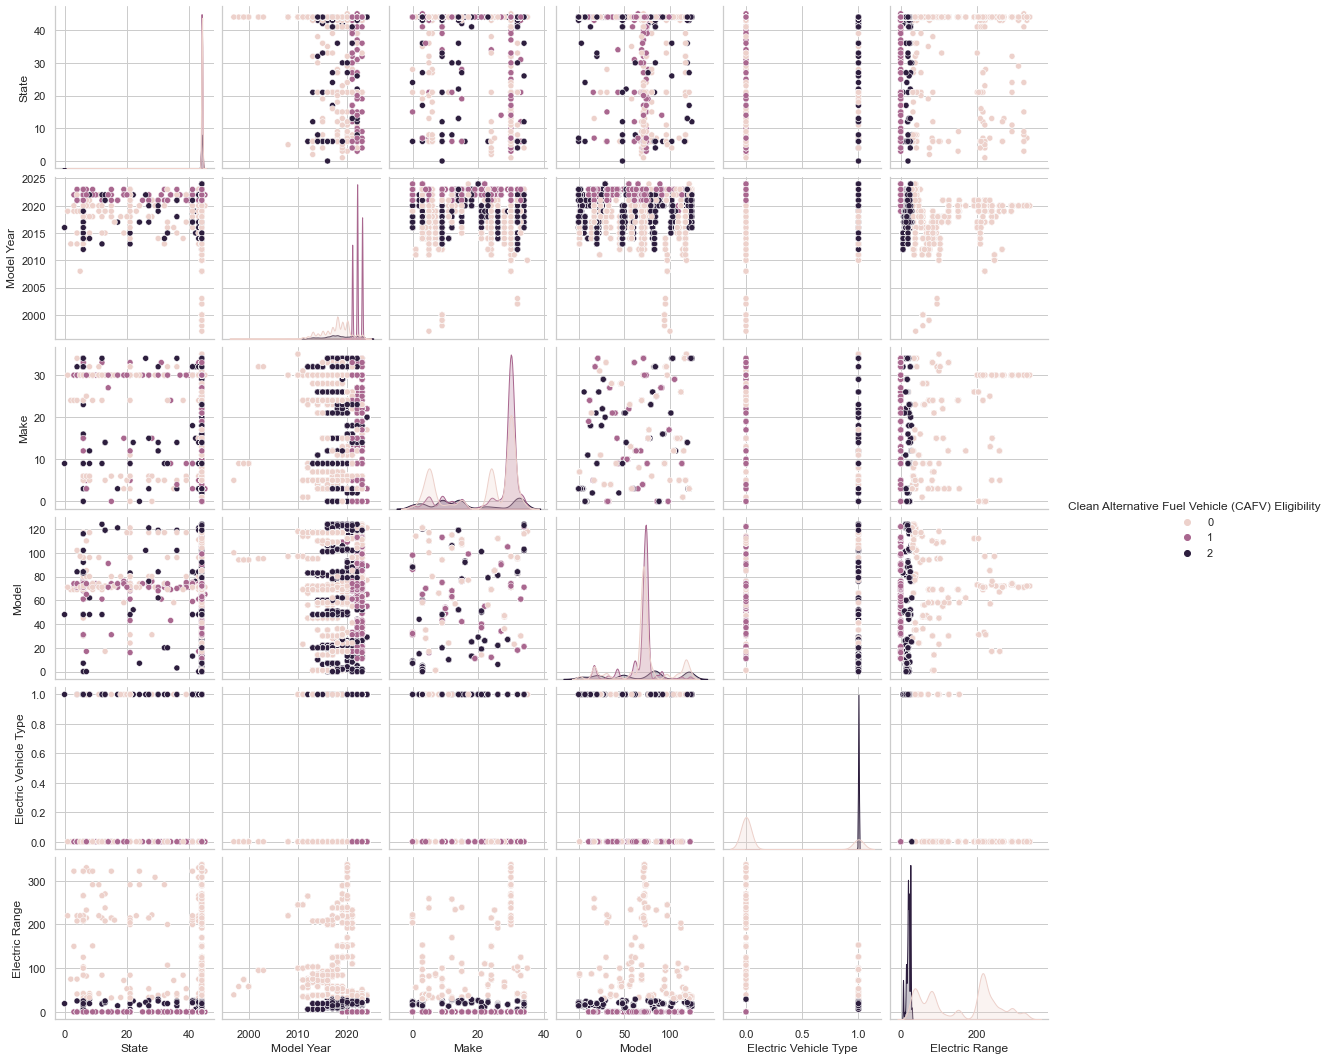

In [68]:
sns.pairplot(df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

<AxesSubplot:xlabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility', ylabel='count'>

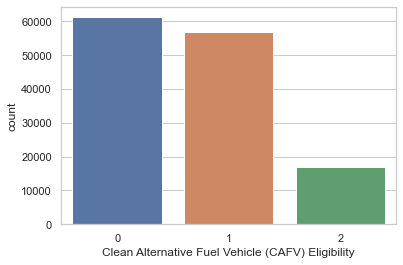

In [41]:
sns.countplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility",data=df)

In [42]:
X = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility',axis = 1)
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

In [43]:
names = X.columns

In [44]:
sc= StandardScaler()
x = sc.fit_transform(X)

In [45]:
x

array([[ 0.04141317, -0.2208375 ,  0.71592932,  0.02718944, -0.54764698,
         1.47258745],
       [ 0.04141317,  0.77860799,  0.14620442, -0.05345649, -0.54764698,
        -0.75540739],
       [ 0.04141317,  0.112311  ,  0.71592932,  0.02718944, -0.54764698,
         1.93844092],
       ...,
       [ 0.04141317,  0.77860799,  0.71592932,  0.0675124 , -0.54764698,
        -0.75540739],
       [ 0.04141317,  1.11175649, -0.9932454 , -0.29539427, -0.54764698,
        -0.75540739],
       [ 0.04141317, -1.88657999, -1.27810785, -2.02928171,  1.82599382,
        -0.56298965]])

In [46]:
x = pd.DataFrame(X)

In [71]:
pickle.dump(sc,open("sc.pkl","wb"))

In [47]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)

x_bal, y_bal = smote.fit_resample(x, y)

In [48]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
lg=LogisticRegression()

log=lg.fit(x_bal, y_bal)

y_pred=lg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[18286     0     0]
 [    0 18293     0]
 [    0     0 18520]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18286
           1       1.00      1.00      1.00     18293
           2       1.00      1.00      1.00     18520

    accuracy                           1.00     55099
   macro avg       1.00      1.00      1.00     55099
weighted avg       1.00      1.00      1.00     55099



In [60]:
RF = RandomForestClassifier()
RF.fit(x_bal, y_bal)
RFtrain =RF.predict(X_train)
RFtest =RF.predict(X_test)
# Print classification report , confusion matrix
print(confusion_matrix(RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report(RFtrain,y_train))
print(classification_report(RFtest,y_test))

[[42935     0     0]
 [    0 42928     0]
 [    0     0 42701]]
[[18286     0     0]
 [    0 18293     0]
 [    0     0 18520]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42935
           1       1.00      1.00      1.00     42928
           2       1.00      1.00      1.00     42701

    accuracy                           1.00    128564
   macro avg       1.00      1.00      1.00    128564
weighted avg       1.00      1.00      1.00    128564

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18286
           1       1.00      1.00      1.00     18293
           2       1.00      1.00      1.00     18520

    accuracy                           1.00     55099
   macro avg       1.00      1.00      1.00     55099
weighted avg       1.00      1.00      1.00     55099



In [50]:
df.head(10)

,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,44,2019,30,71,0,0,220.0
1,44,2022,24,69,0,1,0.0
2,44,2020,30,71,0,0,266.0
3,44,2020,30,71,0,0,322.0
4,44,2013,30,72,0,0,208.0
5,44,2018,3,58,1,0,97.0
6,44,2020,30,71,0,0,308.0
7,44,2021,0,88,1,2,18.0
8,44,2019,32,84,1,2,25.0
9,44,2018,24,69,0,0,151.0


In [65]:
df.tail(10)

,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
135028,44,2023,30,74,0,1,0.0
135029,44,2017,5,117,1,0,53.0
135030,44,2023,14,119,1,2,21.0
135031,44,2022,30,74,0,1,0.0
135032,44,2020,30,71,0,0,308.0
135033,44,2020,30,72,0,0,330.0
135034,44,2021,30,74,0,1,0.0
135035,44,2022,30,72,0,1,0.0
135036,44,2023,12,63,0,1,0.0
135037,44,2014,9,20,1,2,19.0


In [51]:
RF.predict([[44,2019,30,71,0,220.0]])

array([0])

In [52]:
RF.predict([[44,2022,24,69,0,0.0]])

array([1])

In [54]:
RF.predict([[44,2019,32,84,1,25.0]])

array([2])

In [61]:
RF.predict([[44,2014,9,20,1,19.0]])

array([2])

In [66]:
RF.predict([[44,2023,12,63,0,0.0]])

array([1])

In [67]:
RF.predict([[44,2020,30,72,0,330.0]])

array([0])

In [72]:
pickle.dump(RF,open("RF.pkl","wb"))

In [77]:
df['Electric Range'].max()

337.0